# Energy Price Prediction Project

## Previous Notebooks

- [Energy data import and cleaning](1.0-GME-Data.ipynb)
- [Weather data import and cleaning](1.1-Weather-Data.ipynb)
- [Energy price futures import and cleaning](1.2-Futures-Data.ipynb)
- [Gas price import and cleaning](1.3-Gas-Data.ipynb)
- [Merging data](1.5-Merge-Data.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
energy = pd.read_pickle('..\data\interim\energy.pkl')
energy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33600 entries, 0 to 33599
Data columns (total 61 columns):
date         33600 non-null datetime64[ns]
hour         33600 non-null int64
pun          33600 non-null float64
italy        33600 non-null int64
cnorth       33600 non-null int64
csouth       33600 non-null int64
north        33600 non-null int64
sardinia     33600 non-null int64
sicily       33600 non-null int64
south        33600 non-null int64
AUST-NORD    33600 non-null float64
AUST-XAUS    23856 non-null float64
BRNN-GREC    33600 non-null float64
BRNN-SUD     33600 non-null float64
BSP-SLOV     33600 non-null float64
CNOR-CORS    33600 non-null float64
CNOR-CSUD    33600 non-null float64
CNOR-NORD    33600 non-null float64
COAC-SARD    33600 non-null float64
CORS-CNOR    33600 non-null float64
CORS-SARD    33600 non-null float64
CSUD-CNOR    33600 non-null float64
CSUD-SARD    33600 non-null float64
CSUD-SUD     33600 non-null float64
FOGN-SUD     33600 non-null float64


The weather data hasn't the same depth than the GME data, so I'm dropping all rows for which weather data is missing:

In [3]:
# energy = energy[~np.isnan(market_weather['hdd_liml'])].copy()

In [3]:
energy.describe().T

,count,mean,std,min,25%,50%,75%,max
hour,33600.0,12.500119,6.922496,1.00,6.750,12.500000,18.250000,25.00000
pun,33600.0,49.612224,14.772331,2.23,40.000,48.262806,56.883825,162.40983
italy,33600.0,32717.561339,7391.419896,16474.00,26230.750,32267.500000,39012.000000,55559.00000
cnorth,33600.0,3518.346458,835.830990,1003.00,2808.000,3424.000000,4225.000000,7152.00000
csouth,33600.0,5220.808869,1155.191528,1673.00,4214.000,5294.500000,6087.000000,9266.00000
north,33600.0,18199.481935,4684.045565,8089.00,14296.000,17484.500000,22401.250000,31585.00000
sardinia,33600.0,971.637857,149.437815,539.00,854.000,971.000000,1077.000000,1802.00000
sicily,33600.0,2021.081786,399.349530,125.00,1709.000,2028.000000,2302.000000,3393.00000
south,33600.0,2786.204435,596.893025,1120.00,2322.000,2758.000000,3174.000000,7589.00000
AUST-NORD,33600.0,10000.000000,0.000000,10000.00,10000.000,10000.000000,10000.000000,10000.00000


I start by adding year, month and day of week and looking at a correlation heatmap.

In [4]:
energy['day_of_week'] = energy['date'].dt.weekday
energy['month'] = energy['date'].dt.month
energy['year'] = energy['date'].dt.year

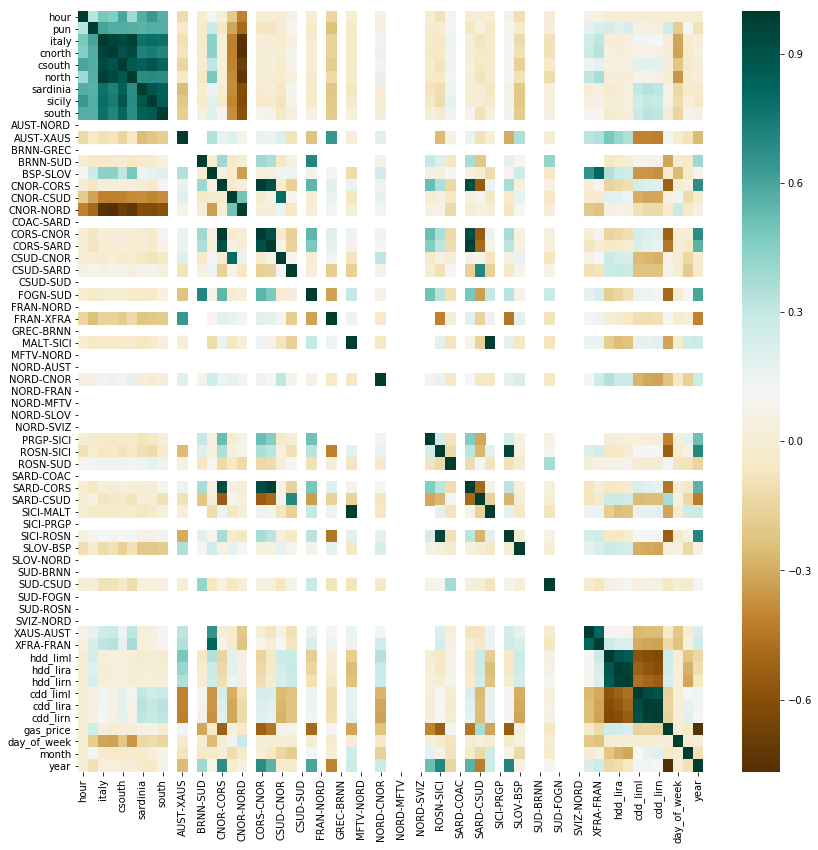

In [5]:
plt.figure(figsize=(14, 14))
sns.heatmap(energy.corr(), cmap='BrBG');

There are many transit features which aren't correlated to anything: this is due to the fact that they have always the same value across all the dataset. These features aren't very informative so I'm dropping them right away.

In [6]:
unique_value_cols = [col for col in energy.columns if len(energy[col].unique()) == 1]

In [7]:
energy.drop(unique_value_cols, axis=1, inplace=True)

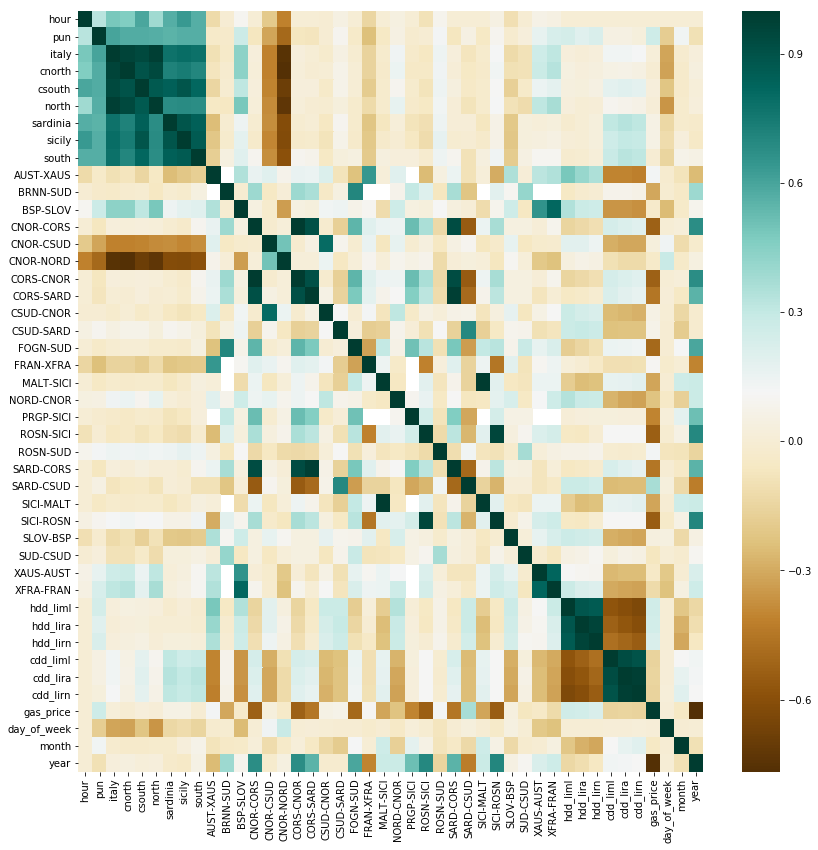

In [8]:
plt.figure(figsize=(14, 14))
sns.heatmap(energy.corr(), cmap='BrBG');
# plt.savefig('../reports/figures/heatmap.png');

PUN is positively correlated to the energy demand in all the zones; it is also negatively correlated to the transit limits between some zones, especially the limits involving center-north of Italy.

Also weather data is correlated to the PUN: HDDs are positively correlated while the correlation with CDDs is negative.

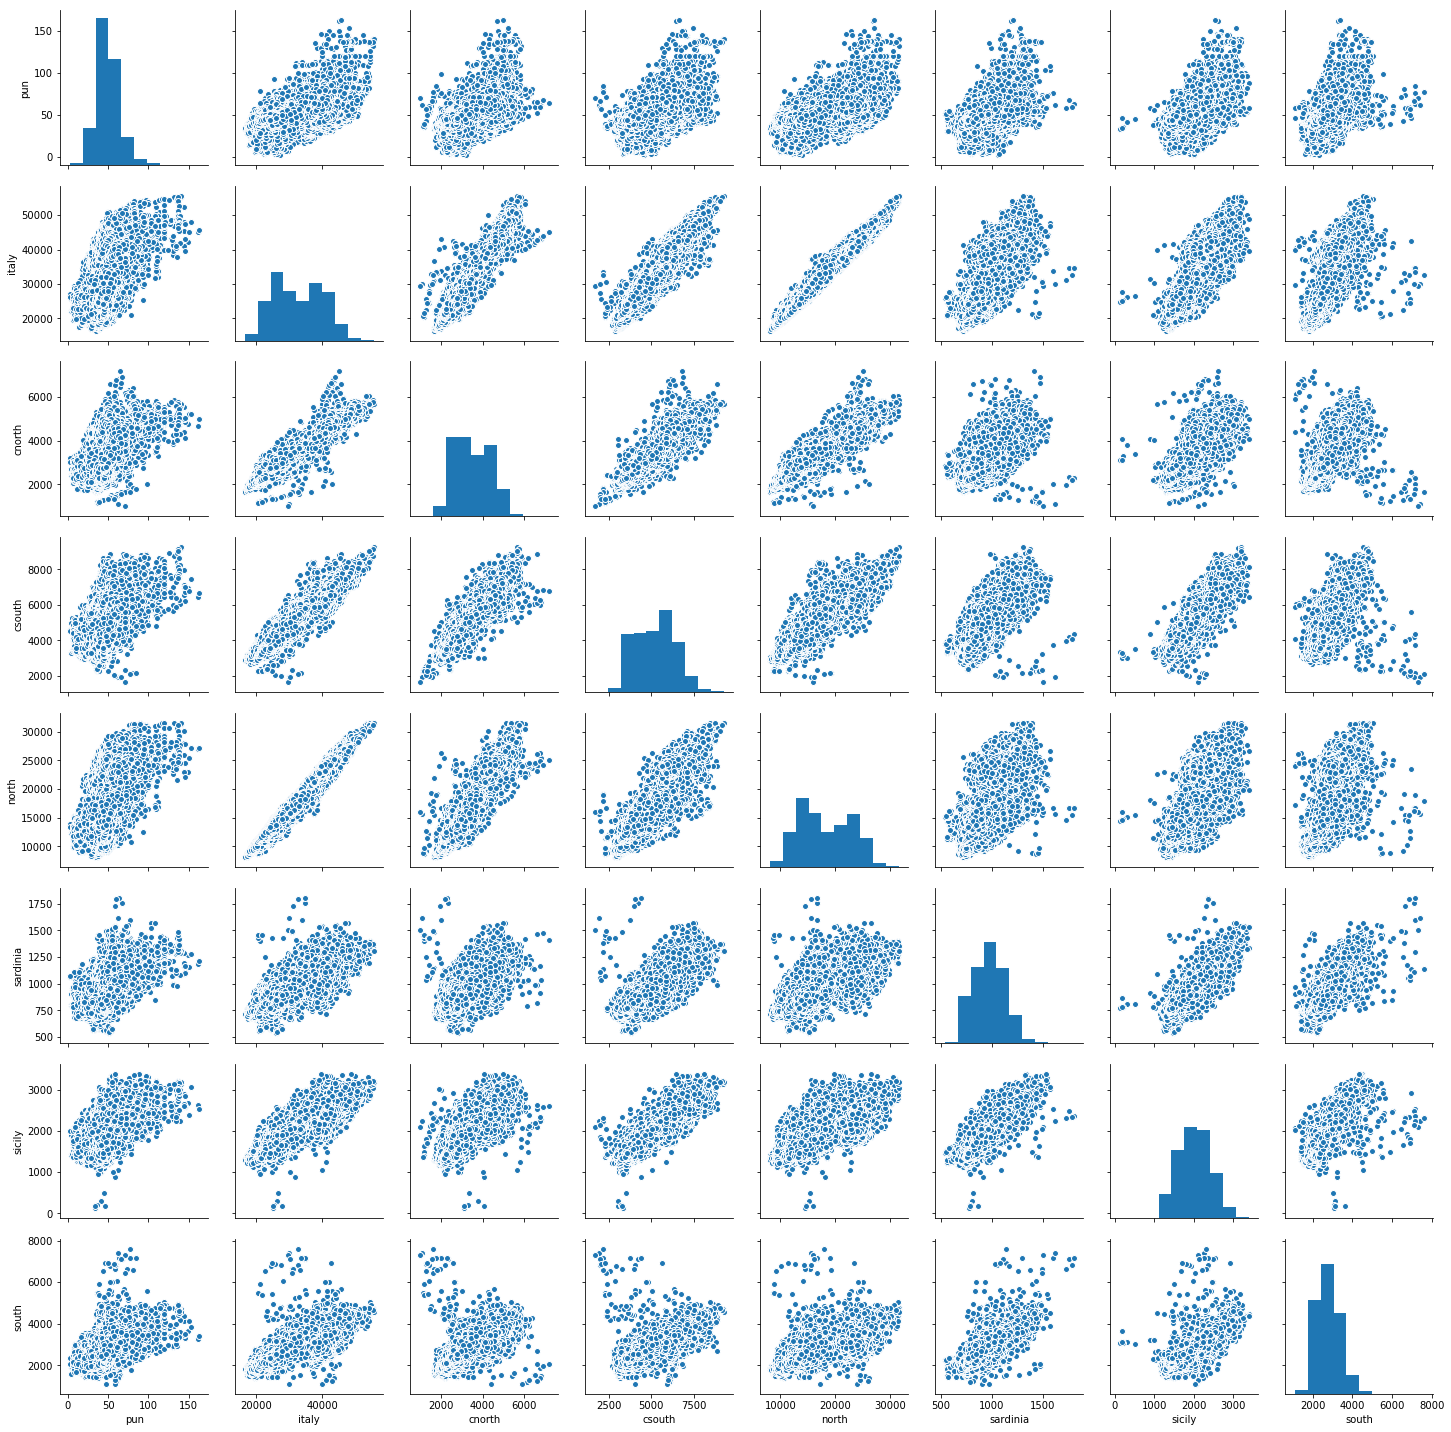

In [9]:
ax = sns.pairplot(energy[['pun', 'italy', 'cnorth', 'csouth', 'north', 'sardinia', 'sicily', 'south']]);
# plt.savefig('../reports/figures/pairplot_demand.png');

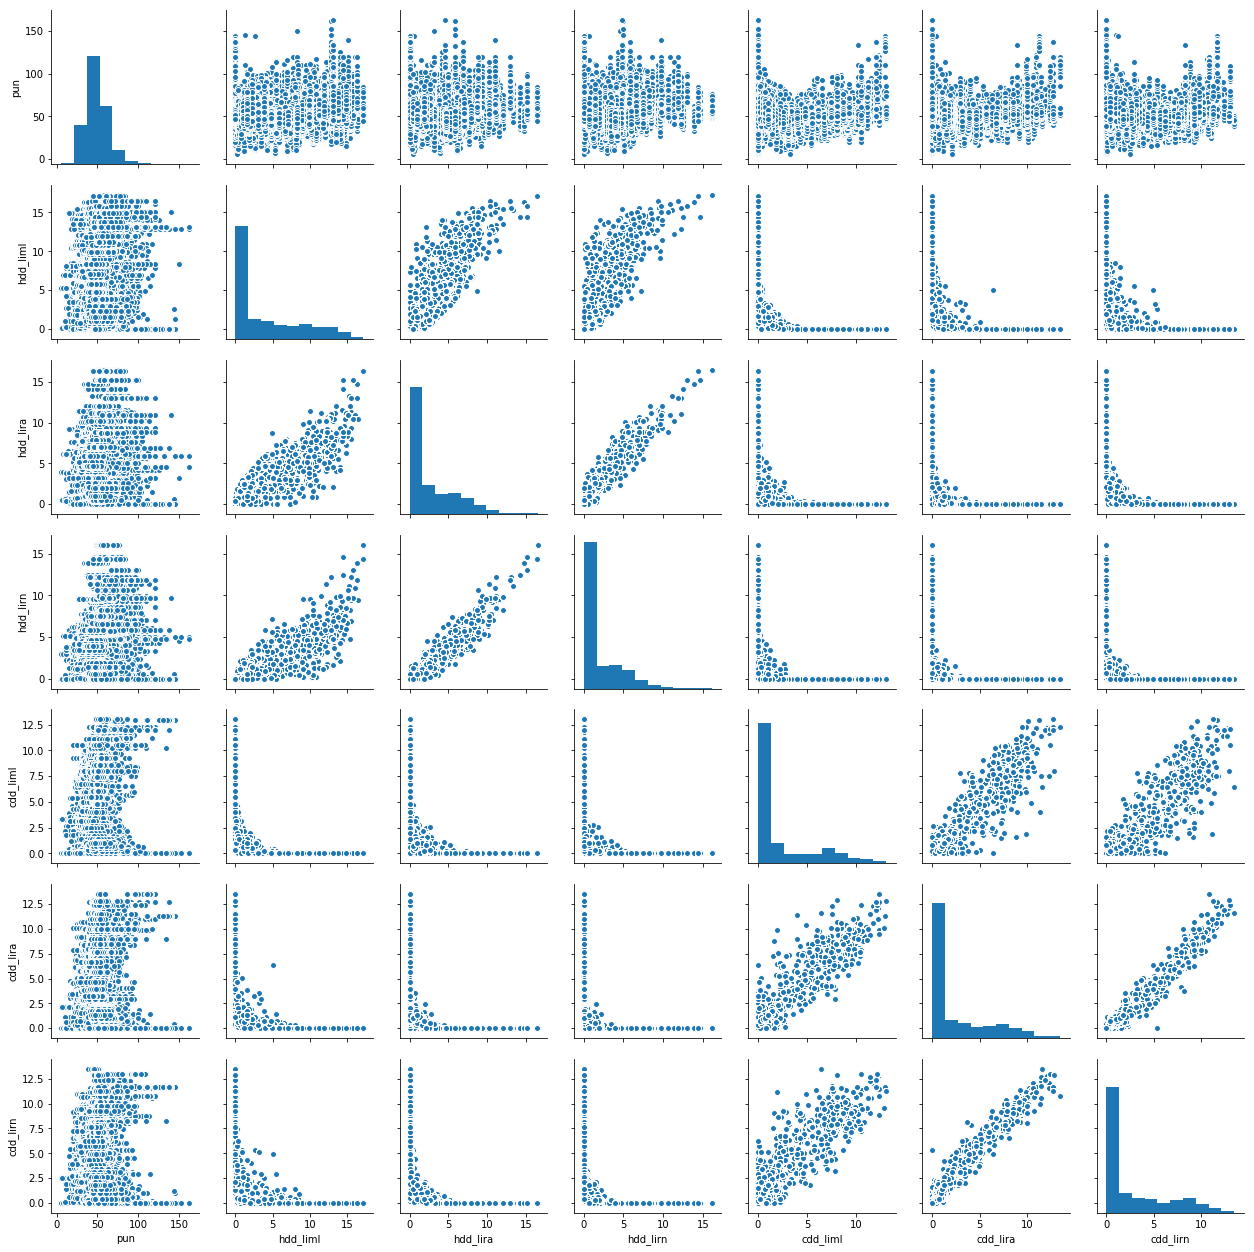

In [12]:
ax = sns.pairplot(energy.loc[~np.isnan(energy['hdd_liml']),
                             ['pun', 'hdd_liml', 'hdd_lira', 'hdd_lirn', 'cdd_liml', 'cdd_lira', 'cdd_lirn']]);
# plt.savefig('../reports/figures/pairplot_temp.png');

There is a slight linear relationship between PUN and demand, but there is also correlation between the demands from the various zones.

The same applies for weather data, with the stations being strongly correlated between each other.

Now I'm going to see how the PUN varies through time-related variables:

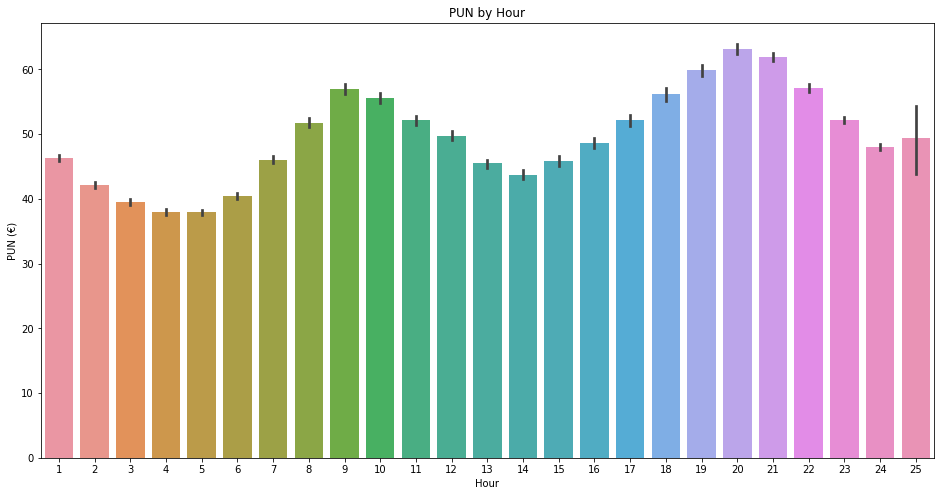

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=energy['hour'], y=energy['pun'], ax=ax)
ax.set_title('PUN by Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('PUN (€)');
# plt.savefig('../reports/figures/PUN_by_hour.png');

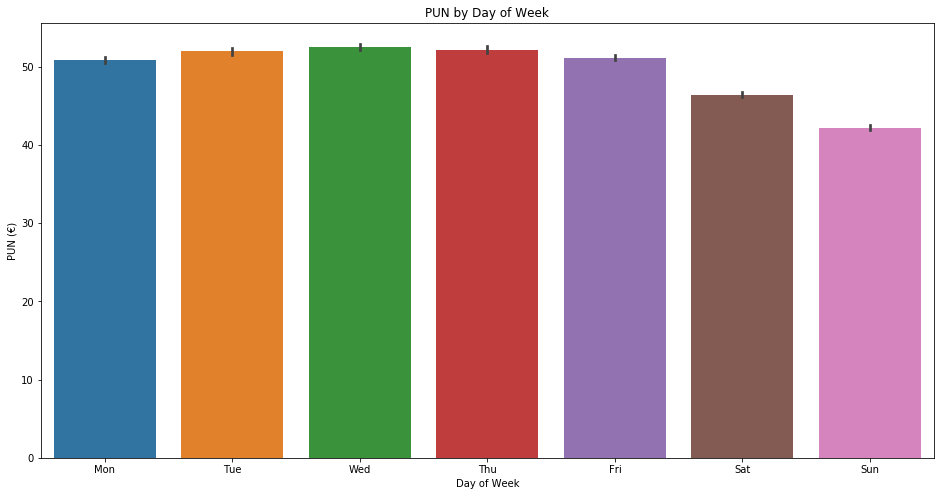

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=energy['day_of_week'], y=energy['pun'], ax=ax)
ax.set_title('PUN by Day of Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('PUN (€)')
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);
# plt.savefig('../reports/figures/PUN_by_weekday.png');

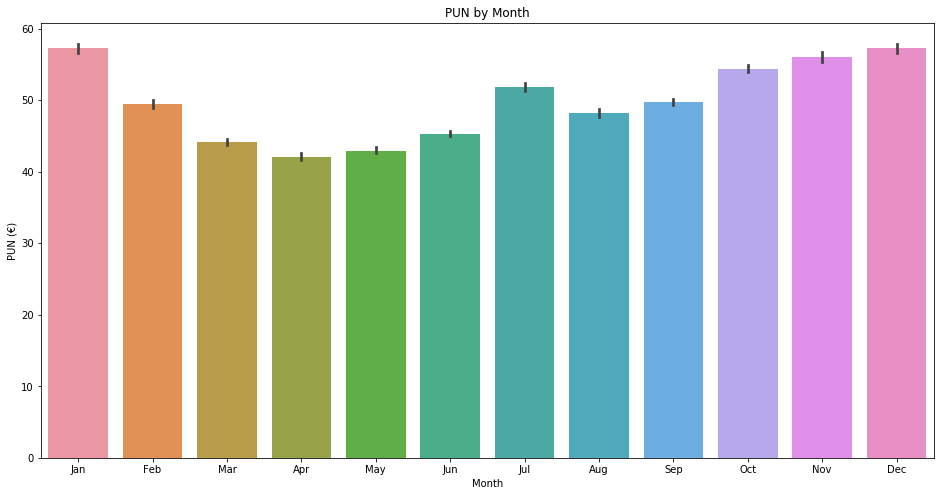

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(x=energy['month'], y=energy['pun'], ax=ax)
ax.set_title('PUN by Month')
ax.set_xlabel('Month')
ax.set_ylabel('PUN (€)')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);
# plt.savefig('../reports/figures/PUN_by_month.png');

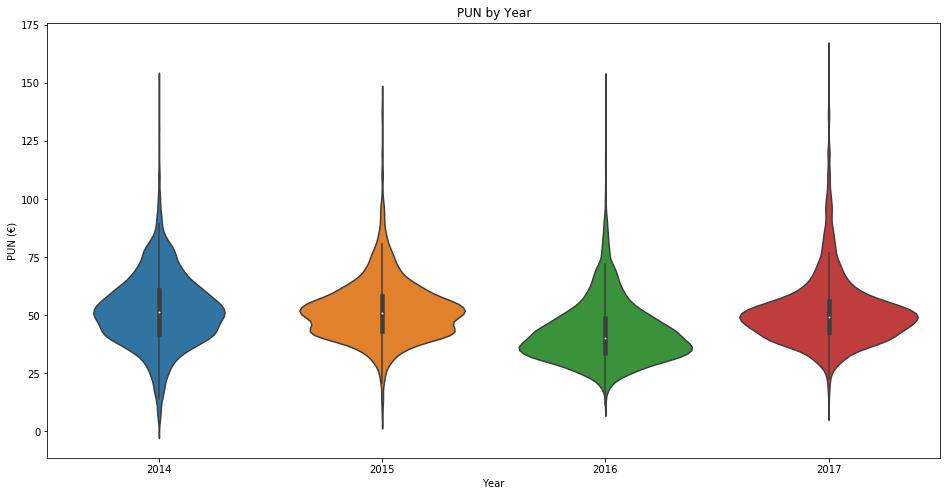

In [16]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.violinplot(x=energy['year'], y=energy['pun'], ax=ax)
ax.set_title('PUN by Year')
ax.set_xlabel('Year')
ax.set_ylabel('PUN (€)');
# plt.savefig('../reports/figures/PUN_by_year.png');

There are definitely some peaks in the price in certain hours of the day, especially the evening, and in the winter months; while the price is lower in the weekends.

There also seems to be a significant plunge in the PUN for 2016 but I don't want to use the year as a variable (I wouldn't have enough data to use it effectively at the beginning of each year), so I'm going to try to model it using some other variable.

To do so I'm plotting some time series:

In [17]:
market_ts = energy.groupby('date').mean()
market_ts.drop(['hour', 'AUST-XAUS', 'BRNN-SUD', 'BSP-SLOV', 'CNOR-CORS',
                'CNOR-CSUD', 'CNOR-NORD', 'CORS-CNOR', 'CORS-SARD', 'CSUD-CNOR',
                'CSUD-SARD', 'FOGN-SUD', 'FRAN-XFRA', 'MALT-SICI', 'NORD-CNOR',
                'PRGP-SICI', 'ROSN-SICI', 'ROSN-SUD', 'SARD-CORS', 'SARD-CSUD',
                'SICI-MALT', 'SICI-ROSN', 'SLOV-BSP', 'SUD-CSUD', 'XAUS-AUST',
                'XFRA-FRAN', 'day_of_week', 'month', 'year'], axis=1, inplace=True)

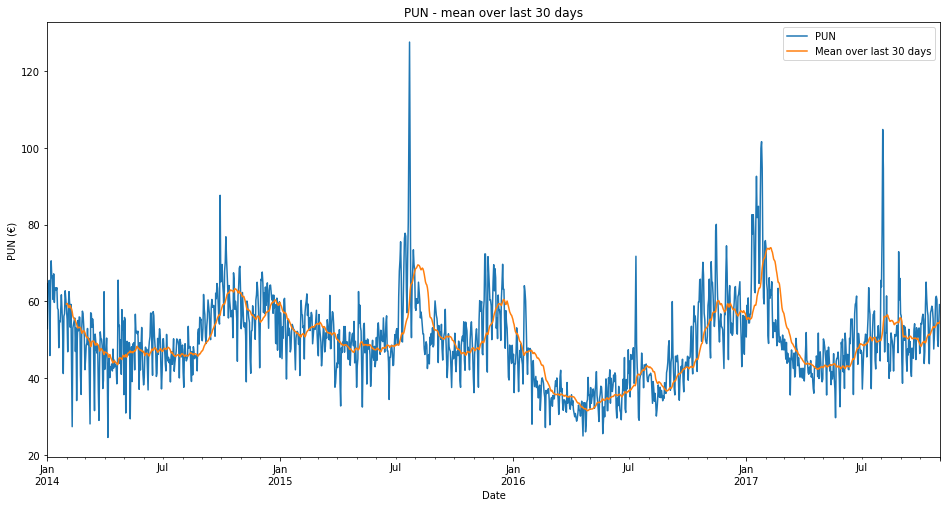

In [18]:
fig, ax = plt.subplots(figsize=(16, 8))
market_ts['pun'].plot(ax=ax, label='PUN');
# this includes today, I want it from yesterday so I'm going to join the series plus one day to the original dataframe
market_ts['pun'].rolling(window=30).mean().shift(periods=1, freq='d').plot(ax=ax, label='Mean over last 30 days');
ax.set_title('PUN - mean over last 30 days')
ax.set_xlabel('Date')
ax.set_ylabel('PUN (€)')
ax.legend();
# plt.savefig('../reports/figures/PUN_and_last30.png');

Based on this plot I think I could use the rolling mean over the last 30 days to keep track of the order of magnitude of the PUN in a period.

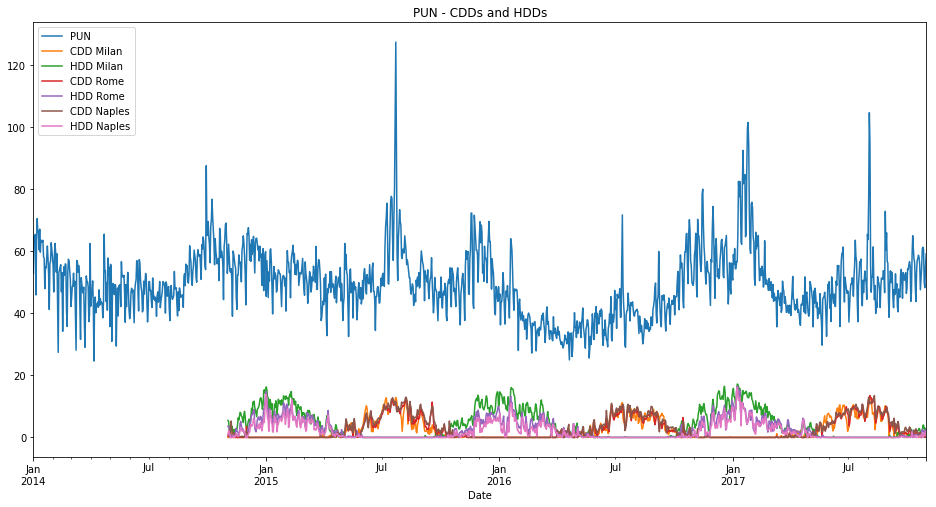

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))
market_ts.plot(y=['pun', 'cdd_liml', 'hdd_liml', 'cdd_lira', 'hdd_lira', 'cdd_lirn', 'hdd_lirn'], ax=ax)
ax.set_title('PUN - CDDs and HDDs')
ax.set_xlabel('Date')
ax.legend(['PUN', 'CDD Milan', 'HDD Milan', 'CDD Rome', 'HDD Rome', 'CDD Naples', 'HDD Naples']);
# plt.savefig('../reports/figures/PUN_and_temp.png');

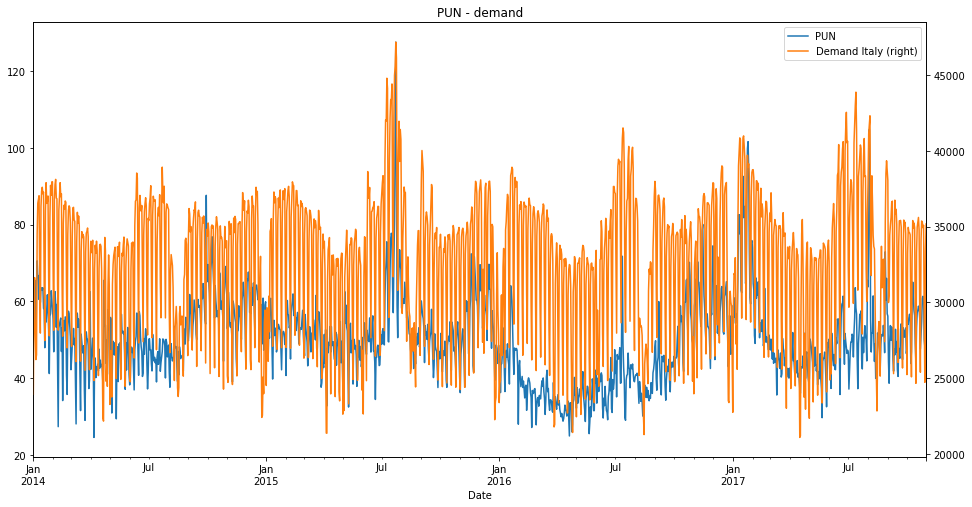

In [20]:
fig, ax = plt.subplots(figsize=(16, 8))
market_ts.rename(columns={'pun':'PUN', 'italy':'Demand Italy'})\
        .plot(y=['PUN', 'Demand Italy'], secondary_y='Demand Italy', ax=ax)
ax.set_title('PUN - demand')
ax.set_xlabel('Date');
# plt.savefig('../reports/figures/PUN_and_demand.png');

Finally, this last two plots shows the relation between PUN and weather data and between PUN and demand.

## Following Notebooks

- [Feature engineering](3.0-Feature-Engineering.ipynb)
- [More exploratory data analysis](4.0-EDA-Bis.ipynb)
- [Predictive model](5.0-Model.ipynb)